In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("/Users/anchanghun/Downloads/diabetes.csv")


In [2]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = df.drop('BMI',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,0.627,50,1
1,1,85,66,29,0,0.351,31,0
2,8,183,64,0,0,0.672,32,1
3,1,89,66,23,94,0.167,21,0
4,0,137,40,35,168,2.288,33,1


In [6]:
y = df['BMI']
y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [7]:
X = X.values

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((614, 8), (614,), (154, 8), (154,))

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(8,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 30)                270       
                                                                 
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1303 (5.09 KB)
Trainable params: 1303 (5.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
N_EPOCHS = 30

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/30
20/20 [==============================] - 0s 2ms/step - loss: 466.2116 - mse: 466.2116 - val_loss: 408.5401 - val_mse: 408.5401
Epoch 2/30
20/20 [==============================] - 0s 807us/step - loss: 441.7617 - mse: 441.7617 - val_loss: 385.7550 - val_mse: 385.7550
Epoch 3/30
20/20 [==============================] - 0s 830us/step - loss: 418.2706 - mse: 418.2706 - val_loss: 364.2195 - val_mse: 364.2195
Epoch 4/30
20/20 [==============================] - 0s 837us/step - loss: 395.8250 - mse: 395.8250 - val_loss: 343.5544 - val_mse: 343.5544
Epoch 5/30
20/20 [==============================] - 0s 806us/step - loss: 374.1119 - mse: 374.1119 - val_loss: 323.2671 - val_mse: 323.2671
Epoch 6/30
20/20 [==============================] - 0s 816us/step - loss: 352.8421 - mse: 352.8421 - val_loss: 304.0486 - val_mse: 304.0486
Epoch 7/30
20/20 [==============================] - 0s 814us/step - loss: 332.4763 - mse: 332.4763 - val_loss: 285.0736 - val_mse: 285.0736
Epoch 8/30
20/20 [====

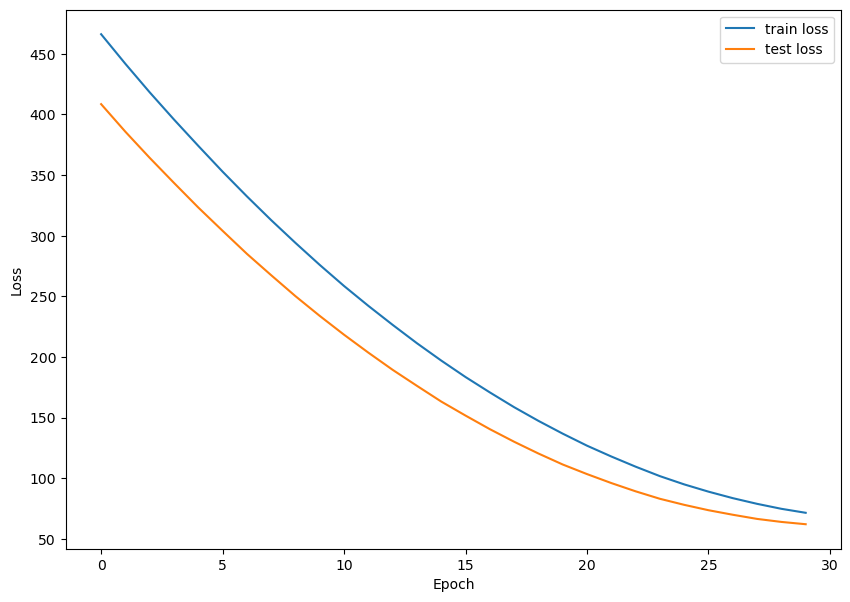

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 949us/step - loss: 62.0398 - mse: 62.0398


[62.03977966308594, 62.03977966308594]